#### The purpose of this work is to apply Principal component analysis (PCA) which is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

<strong>Source:</strong>
This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

* Cleveland: 303 observations
* Hungarian: 294 observations
* Switzerland: 123 observations
* Long Beach VA: 200 observations
* Stalog (Heart) Data Set: 270 observations
* Total: 1190 observations
* Duplicated: 272 observations

* Final dataset: 918 observations

Every dataset used can be found under the Index of heart disease datasets from UCI Machine Learning Repository on the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

<strong>Reference</strong>
fedesoriano. (September 2021). Heart Failure Prediction Dataset. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/heart-failure-prediction.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv("heart.csv")

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


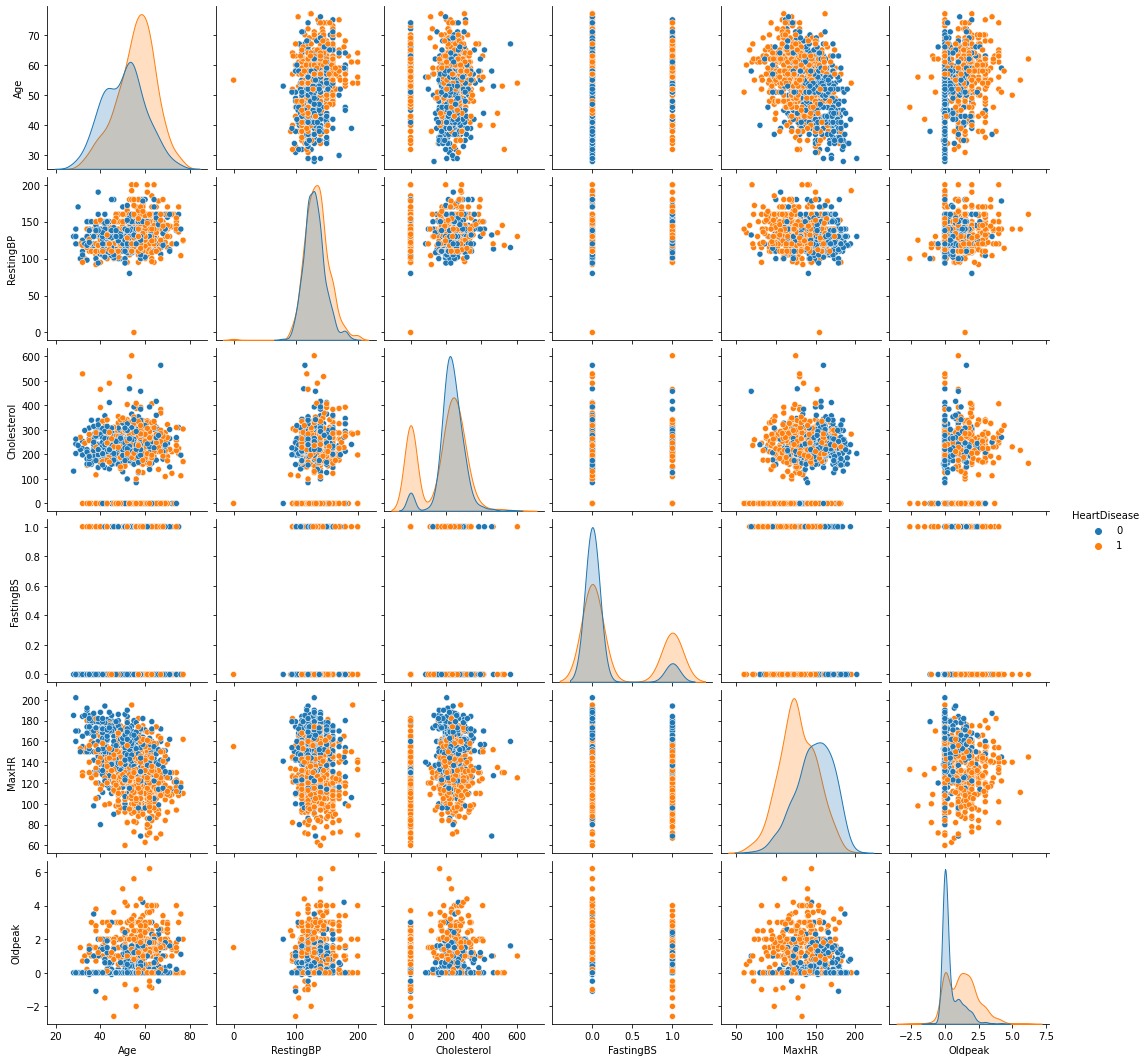

In [5]:
sns.pairplot(df,hue="HeartDisease")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
pd.get_dummies(data=df,columns=["Sex","ChestPainType","RestingECG","RestingECG","ExerciseAngina","ST_Slope"],drop_first=True)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,0,0,1,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,1,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,1,0,0,0,1,0,1,0,1,1,0
916,57,130,236,0,174,0.0,1,0,1,0,0,0,0,0,0,0,1,0


In [8]:
df=pd.get_dummies(data=df,columns=["Sex","ChestPainType","RestingECG","RestingECG","ExerciseAngina","ST_Slope"],drop_first=True)

In [9]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,1,0,0,0,1


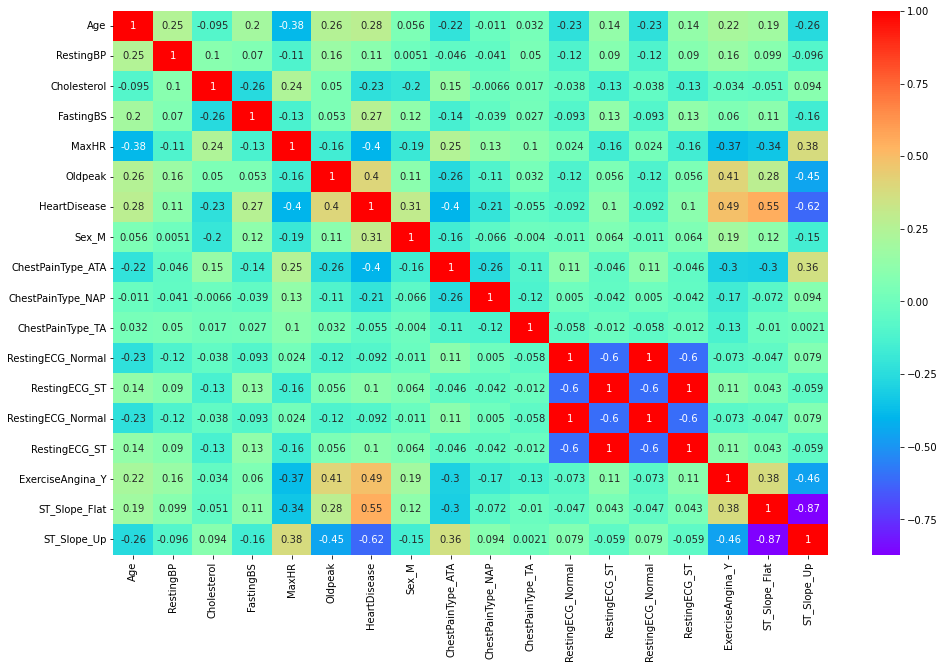

In [10]:
fig=plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True, cmap="rainbow")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_M              918 non-null    uint8  
 8   ChestPainType_ATA  918 non-null    uint8  
 9   ChestPainType_NAP  918 non-null    uint8  
 10  ChestPainType_TA   918 non-null    uint8  
 11  RestingECG_Normal  918 non-null    uint8  
 12  RestingECG_ST      918 non-null    uint8  
 13  RestingECG_Normal  918 non-null    uint8  
 14  RestingECG_ST      918 non-null    uint8  
 15  ExerciseAngina_Y   918 non-null    uint8  
 16  ST_Slope_Flat      918 non

In [12]:
df.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [13]:
df=df[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y',
       'ST_Slope_Flat', 'ST_Slope_Up','HeartDisease']]

In [14]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,...,RestingECG_ST,RestingECG_ST,RestingECG_Normal,RestingECG_Normal,RestingECG_ST,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289,0,172,0.0,1,1,0,0,...,0,0,1,1,0,0,0,0,1,0
1,49,160,180,0,156,1.0,0,0,1,0,...,0,0,1,1,0,0,0,1,0,1
2,37,130,283,0,98,0.0,1,1,0,0,...,1,1,0,0,1,1,0,0,1,0
3,48,138,214,0,108,1.5,0,0,0,0,...,0,0,1,1,0,0,1,1,0,1
4,54,150,195,0,122,0.0,1,0,1,0,...,0,0,1,1,0,0,0,0,1,0


In [15]:
scal=StandardScaler()

In [16]:
x=df.drop("HeartDisease",axis=1)

In [17]:
x_scal=scal.fit_transform(x)

In [18]:
pca_decom=PCA(0.95)

In [19]:
x_pca=pca_decom.fit_transform(x_scal)

In [20]:
pca_decom.explained_variance_ratio_

array([0.31514363, 0.14992678, 0.08762475, 0.06374636, 0.0569728 ,
       0.05242518, 0.04932824, 0.04472506, 0.03907074, 0.03641781,
       0.02983997, 0.02917083])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, df["HeartDisease"], test_size=0.2, random_state=42)

In [22]:
lr=LogisticRegression()

In [23]:
lr.fit(X_train,y_train)

LogisticRegression()

In [24]:
y_pred=lr.predict(X_test)

In [25]:
accuracy_score(y_test,y_pred)

0.8478260869565217

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


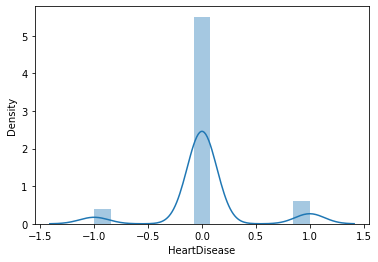

In [26]:
sns.distplot(y_test-y_pred)

In [27]:
print (confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[66 11]
 [17 90]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.82        77
           1       0.89      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



In [28]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [29]:
param={'C':[1.0,10,100,1000],
       'gamma':[1,0.1,0.01,0.001,0.0001]
}


In [30]:
grid=GridSearchCV(SVC(),param_grid=param)

In [31]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1.0, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]})

In [32]:
grid.best_params_

{'C': 10, 'gamma': 0.01}

In [33]:
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print (accuracy_score(y_test,y_pred),"\n",confusion_matrix(y_test,y_pred),"\n",classification_report(y_test,y_pred))


0.875 
 [[68  9]
 [14 93]] 
               precision    recall  f1-score   support

           0       0.83      0.88      0.86        77
           1       0.91      0.87      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184



In [34]:
svc=SVC(C=10, gamma= 0.01)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print (accuracy_score(y_test,y_pred),"\n",confusion_matrix(y_test,y_pred),"\n",classification_report(y_test,y_pred))


0.875 
 [[67 10]
 [13 94]] 
               precision    recall  f1-score   support

           0       0.84      0.87      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



In [35]:
X_train.shape

(734, 12)

In [36]:
x_pca.shape

(918, 12)

In [37]:
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred=tree.predict(X_test)
print (accuracy_score(y_test,y_pred),"\n",confusion_matrix(y_test,y_pred),"\n",classification_report(y_test,y_pred))


0.782608695652174 
 [[65 12]
 [28 79]] 
               precision    recall  f1-score   support

           0       0.70      0.84      0.76        77
           1       0.87      0.74      0.80       107

    accuracy                           0.78       184
   macro avg       0.78      0.79      0.78       184
weighted avg       0.80      0.78      0.78       184



In [38]:
rand=RandomForestClassifier()
rand.fit(X_train,y_train)
y_pred=rand.predict(X_test)
print (accuracy_score(y_test,y_pred),"\n",confusion_matrix(y_test,y_pred),"\n",classification_report(y_test,y_pred))


0.8315217391304348 
 [[65 12]
 [19 88]] 
               precision    recall  f1-score   support

           0       0.77      0.84      0.81        77
           1       0.88      0.82      0.85       107

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.84      0.83      0.83       184

